In [21]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

import xarray as xr
print('xarray: %s' % xr.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)


# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)

pandas: 1.1.5
xarray: 0.11.3
geopandas: 1.19.2
tensorflow: 2.0.0
Tensorflow/Keras: 2.2.4-tf
pandas: 1.1.5
numpy: 1.19.2
sklearn: 0.24.2
plotly: 5.6.0
/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib


# Importing Datasets

In [22]:
test_set = pd.read_csv('Real_Tomorrow/test_real_tom_target.csv')
validation_set = pd.read_csv('Real_Tomorrow/validation_real_tom_target.csv')
training_set = pd.read_csv('Real_Tomorrow/training_real_tom_target.csv')

In [23]:
#training data set
new_training_set = training_set.drop(columns=['Unnamed: 0'])
new_training_set

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,Real_tom_lsm
0,1980-01-01,0.0,20.0,0.000007,80.761185,1.909660,-3.323872,1.687164,-1.823624,-247.54074,0.00000,0.0,0.0
1,1980-01-01,0.0,22.5,0.000004,80.703650,1.165733,-2.844494,1.060593,-1.991425,-240.00592,0.00000,0.0,0.0
2,1980-01-01,0.0,25.0,0.000007,78.231514,-1.311676,-2.125244,3.280617,-1.931789,-223.76889,0.00000,0.0,0.0
3,1980-01-01,0.0,27.5,0.000010,79.631010,-3.777573,-1.122395,5.743889,-1.243538,-235.55556,0.00000,0.0,0.0
4,1980-01-01,0.0,30.0,0.000010,71.573875,-5.734505,-1.362953,6.514030,-0.954163,-254.03260,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268766,2010-12-31,-30.0,80.0,0.000015,26.797535,25.075424,-3.653679,-1.221291,1.515594,-273.34204,296.89227,0.0,0.0
4268767,2010-12-31,-30.0,82.5,-0.000006,27.766910,24.175919,-2.866638,-6.724304,0.861771,-280.37018,296.03314,0.0,0.0
4268768,2010-12-31,-30.0,85.0,0.000010,29.111805,24.655510,-2.809170,-10.138817,0.051220,-281.05167,295.36078,0.0,0.0
4268769,2010-12-31,-30.0,87.5,0.000006,27.833050,25.088104,-2.730087,-11.036507,0.666927,-280.05610,295.10638,0.0,0.0


In [24]:
#validation data set
training_set_wt = validation_set.drop(columns=['Unnamed: 0'])
training_set_wt

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,Real_tom_lsm
0,2011-01-01,0.0,20.0,0.000003,73.016390,-5.760780,-4.216808,6.860649,-4.352928,-212.59741,0.00000,0.0,0.0
1,2011-01-01,0.0,22.5,0.000003,74.569660,-4.942451,-3.857407,6.459419,-3.991157,-198.23593,0.00000,0.0,0.0
2,2011-01-01,0.0,25.0,0.000004,80.080090,-3.848740,-3.175144,6.303680,-3.446140,-195.83296,0.00000,0.0,0.0
3,2011-01-01,0.0,27.5,0.000012,83.676704,0.330811,-2.526569,7.235268,-2.307594,-191.47444,0.00000,0.0,0.0
4,2011-01-01,0.0,30.0,0.000011,76.225440,3.678749,-1.027561,7.020271,-0.077572,-191.98111,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688397,2015-12-31,-30.0,80.0,0.000014,70.662056,23.560066,1.655861,9.690376,3.621418,-271.57556,296.77530,0.0,0.0
688398,2015-12-31,-30.0,82.5,-0.000006,51.213654,22.381706,0.321705,9.860390,-0.099480,-269.94592,296.44290,0.0,0.0
688399,2015-12-31,-30.0,85.0,0.000009,46.678970,22.464828,0.851299,7.661758,-0.725330,-270.18890,295.73486,0.0,0.0
688400,2015-12-31,-30.0,87.5,0.000002,59.362090,22.364807,0.543045,5.595253,-1.542034,-264.07333,295.24792,0.0,0.0


In [25]:
#validation data set
validation_set_wt = validation_set.drop(columns=['Unnamed: 0'])
validation_set_wt

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,Real_tom_lsm
0,2011-01-01,0.0,20.0,0.000003,73.016390,-5.760780,-4.216808,6.860649,-4.352928,-212.59741,0.00000,0.0,0.0
1,2011-01-01,0.0,22.5,0.000003,74.569660,-4.942451,-3.857407,6.459419,-3.991157,-198.23593,0.00000,0.0,0.0
2,2011-01-01,0.0,25.0,0.000004,80.080090,-3.848740,-3.175144,6.303680,-3.446140,-195.83296,0.00000,0.0,0.0
3,2011-01-01,0.0,27.5,0.000012,83.676704,0.330811,-2.526569,7.235268,-2.307594,-191.47444,0.00000,0.0,0.0
4,2011-01-01,0.0,30.0,0.000011,76.225440,3.678749,-1.027561,7.020271,-0.077572,-191.98111,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688397,2015-12-31,-30.0,80.0,0.000014,70.662056,23.560066,1.655861,9.690376,3.621418,-271.57556,296.77530,0.0,0.0
688398,2015-12-31,-30.0,82.5,-0.000006,51.213654,22.381706,0.321705,9.860390,-0.099480,-269.94592,296.44290,0.0,0.0
688399,2015-12-31,-30.0,85.0,0.000009,46.678970,22.464828,0.851299,7.661758,-0.725330,-270.18890,295.73486,0.0,0.0
688400,2015-12-31,-30.0,87.5,0.000002,59.362090,22.364807,0.543045,5.595253,-1.542034,-264.07333,295.24792,0.0,0.0


In [26]:
#test data set
test_set_wt = test_set.drop(columns=['Unnamed: 0'])
test_set_wt

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,Real_tom_lsm
0,2016-01-01,0.0,20.0,0.000011,80.796135,-2.052292,0.008678,4.996910,-1.678764,-272.04962,0.00000,0.0,0.0
1,2016-01-01,0.0,22.5,0.000011,77.748420,-4.445312,0.740505,7.517281,0.792618,-250.63333,0.00000,0.0,0.0
2,2016-01-01,0.0,25.0,-0.000001,71.178825,-3.778427,1.056324,9.333221,0.688252,-229.52519,0.00000,0.0,0.0
3,2016-01-01,0.0,27.5,-0.000005,73.585754,-4.695709,1.236446,9.589882,0.555519,-240.80815,0.00000,0.0,0.0
4,2016-01-01,0.0,30.0,-0.000016,72.382780,-4.002563,0.734211,5.410950,-1.086350,-262.45557,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539482,2019-12-01,-30.0,80.0,0.000006,2.637233,33.277840,5.379345,-0.286896,5.558327,-277.60870,294.14987,0.0,0.0
539483,2019-12-01,-30.0,82.5,-0.000020,23.660923,34.272537,6.438683,-13.026535,2.857349,-270.80573,294.23798,0.0,0.0
539484,2019-12-01,-30.0,85.0,-0.000019,46.051540,35.755882,7.248966,-18.870102,-3.349407,-249.43092,294.26890,0.0,0.0
539485,2019-12-01,-30.0,87.5,-0.000014,55.855648,34.069664,6.349327,-18.801796,-8.172478,-239.36870,294.36630,0.0,0.0


# extracting X,Y 

In [27]:
##### Step 2 - Split training data
x_training = training_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******training features******")
print (x_training)
y_training = training_set_wt[['Real_tom_lsm']]
print ("******training target******")
print (y_training)

##### Step 3 - Split test data
x_test = test_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******test features******")
print (x_test)
y_test = test_set_wt[['Real_tom_lsm']]
print ("******test target******")
print (y_test)

##### Step 4 - Split validation data
x_validation = validation_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******validation features******")
print (x_validation)
y_validation = validation_set_wt[['Real_tom_lsm']]
print ("******validation target******")
print (y_validation)

******training features******
              vo          r      u_200     u_850     v_200     v_850  \
0       0.000003  73.016390  -5.760780 -4.216808  6.860649 -4.352928   
1       0.000003  74.569660  -4.942451 -3.857407  6.459419 -3.991157   
2       0.000004  80.080090  -3.848740 -3.175144  6.303680 -3.446140   
3       0.000012  83.676704   0.330811 -2.526569  7.235268 -2.307594   
4       0.000011  76.225440   3.678749 -1.027561  7.020271 -0.077572   
...          ...        ...        ...       ...       ...       ...   
688397  0.000014  70.662056  23.560066  1.655861  9.690376  3.621418   
688398 -0.000006  51.213654  22.381706  0.321705  9.860390 -0.099480   
688399  0.000009  46.678970  22.464828  0.851299  7.661758 -0.725330   
688400  0.000002  59.362090  22.364807  0.543045  5.595253 -1.542034   
688401  0.000014  65.915980  23.052147  0.048565  1.080147 -1.203087   

              ttr        sst  
0      -212.59741    0.00000  
1      -198.23593    0.00000  
2      -195.

# Feed Forward Neural Network model 8n 1l

In [28]:
##### Step 5 - Specify the structure of a Neural Network
model_FFNN_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_FFNN_baseline.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#checkPoint
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


h_baselineFFN = model_FFNN_baseline.fit(x_training, y_training, epochs = 10, callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 688402 samples, validate on 688402 samples
Epoch 1/10
688402/688402 [==============================] - 36s 52us/sample - loss: 0.0229 - accuracy: 0.9952 - val_loss: 0.0132 - val_accuracy: 0.9982
Epoch 2/10
688402/688402 [==============================] - 35s 51us/sample - loss: 0.0138 - accuracy: 0.9982 - val_loss: 0.0131 - val_accuracy: 0.9982
Epoch 3/10
688402/688402 [==============================] - 35s 51us/sample - loss: 0.0134 - accuracy: 0.9982 - val_loss: 0.0129 - val_accuracy: 0.9982
Epoch 4/10
688402/688402 [==============================] - 35s 51us/sample - loss: 0.0133 - accuracy: 0.9982 - val_loss: 0.0129 - val_accuracy: 0.9982
Epoch 5/10
688402/688402 [==============================] - 35s 50us/sample - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0130 - val_accuracy: 0.9982
Epoch 6/10
688402/688402 [==============================] - 36s 52us/sample - loss: 0.0131 - accuracy: 0.9982 - val_loss: 0.0129 - val_accuracy: 0.9982
Epoch 7/10
688402/688402 [==========

In [16]:
model_FFNN_baseline.save('models/model_FFNN_baseline_8n_10e')
model_FFNN_baseline.save('models/model_FFNN_baseline_8n_10e.h5')


-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten
Layer:  Hidden-Layer
Layer:  dropout
Layer:  Output-Layer

---------- Evaluation on Training Data ----------


/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    687163
         1.0       0.00      0.00      0.00      1239

    accuracy                           1.00    688402
   macro avg       0.50      0.50      0.50    688402
weighted avg       1.00      1.00      1.00    688402


---------- Evaluation on Test Data ----------


/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    538438
         1.0       0.00      0.00      0.00      1049

    accuracy                           1.00    539487
   macro avg       0.50      0.50      0.50    539487
weighted avg       1.00      1.00      1.00    539487




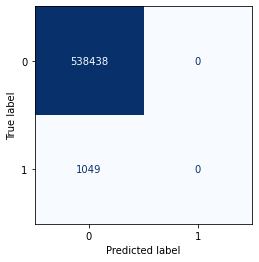

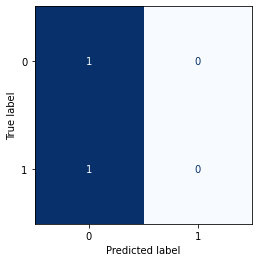

In [9]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_baseline
# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

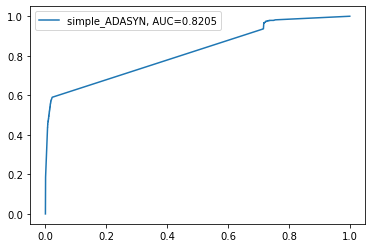

In [11]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_baseline
# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training))
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test))
#> 0.01).astype(int)
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="simple_ADASYN, AUC="+str(auc))





#add legend
plt.legend()

# Feed Forward Neural Network model 512n 1l

In [13]:
##### Step 5 - Specify the structure of a Neural Network
model_FFNN_baseline_512n_1l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_FFNN_baseline_512n_1l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#checkPoint
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


h_baselineFFN = model_FFNN_baseline_512n_1l.fit(x_training, y_training, epochs = 10, callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 688402 samples, validate on 688402 samples
Epoch 1/10
688402/688402 [==============================] - 121s 176us/sample - loss: 0.0112 - accuracy: 0.9981 - val_loss: 0.0117 - val_accuracy: 0.9982
Epoch 2/10
688402/688402 [==============================] - 121s 175us/sample - loss: 0.0109 - accuracy: 0.9982 - val_loss: 0.0097 - val_accuracy: 0.9982
Epoch 3/10
688402/688402 [==============================] - 120s 175us/sample - loss: 0.0108 - accuracy: 0.9982 - val_loss: 0.0096 - val_accuracy: 0.9982
Epoch 4/10
688402/688402 [==============================] - 120s 174us/sample - loss: 0.0108 - accuracy: 0.9981 - val_loss: 0.0102 - val_accuracy: 0.9982
Epoch 5/10
688402/688402 [==============================] - 121s 176us/sample - loss: 0.0109 - accuracy: 0.9981 - val_loss: 0.0105 - val_accuracy: 0.9982
Epoch 6/10
688402/688402 [==============================] - 119s 174us/sample - loss: 0.0109 - accuracy: 0.9981 - val_loss: 0.0102 - val_accuracy: 0.9983
Epoch 7/10
688402/688402

In [14]:
model_FFNN_baseline_512n_1l.save('models/model_FFNN_baseline_512n_1l')
model_FFNN_baseline_512n_1l.save('models/model_FFNN_baseline_512n_1l.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/model_FFNN_baseline_512n_1l/assets



-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 512)               4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_1
Layer:  Hidden-Layer
Layer:  dropout_1
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
  

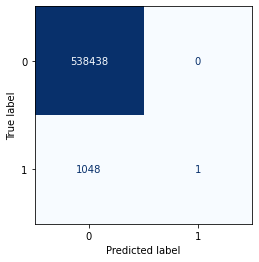

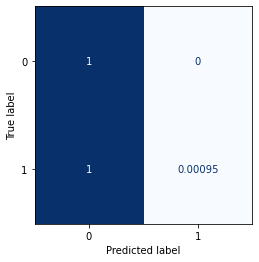

In [15]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_baseline_512n_1l
# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

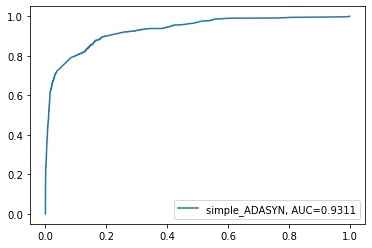

In [16]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_baseline_512n_1l
# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training))
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test))
#> 0.01).astype(int)
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="simple_ADASYN, AUC="+str(auc))





#add legend
plt.legend()

# # Feed Forward Neural Network model 256n, 4l

In [17]:
##### Step 5 - Specify the structure of a Neural Network
model_FFNN_baseline_256n_4l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_FFNN_baseline_256n_4l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#checkPoint
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


h_baselineFFN = model_FFNN_baseline_256n_4l.fit(x_training, y_training, epochs = 10, callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 688402 samples, validate on 688402 samples
Epoch 1/10
688402/688402 [==============================] - 227s 330us/sample - loss: 0.0120 - accuracy: 0.9982 - val_loss: 0.0108 - val_accuracy: 0.9982
Epoch 2/10
688402/688402 [==============================] - 216s 314us/sample - loss: 0.0123 - accuracy: 0.9982 - val_loss: 0.0104 - val_accuracy: 0.9982
Epoch 3/10
688402/688402 [==============================] - 219s 318us/sample - loss: 0.0116 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9982
Epoch 4/10
688402/688402 [==============================] - 249s 361us/sample - loss: 0.0113 - accuracy: 0.9982 - val_loss: 0.0107 - val_accuracy: 0.9982
Epoch 5/10
688402/688402 [==============================] - 328s 477us/sample - loss: 0.0114 - accuracy: 0.9982 - val_loss: 0.0108 - val_accuracy: 0.9982
Epoch 6/10
688402/688402 [==============================] - 219s 318us/sample - loss: 0.0119 - accuracy: 0.9982 - val_loss: 0.0104 - val_accuracy: 0.9982
Epoch 7/10
688402/688402

In [18]:
model_FFNN_baseline_256n_4l.save('models/model_FFNN_baseline_256n_4l')
model_FFNN_baseline_256n_4l.save('models/model_FFNN_baseline_256n_4l.h5')

INFO:tensorflow:Assets written to: models/model_FFNN_baseline_256n_4l/assets



-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_______________________________________________________________

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    687163
         1.0       0.00      0.00      0.00      1239

    accuracy                           1.00    688402
   macro avg       0.50      0.50      0.50    688402
weighted avg       1.00      1.00      1.00    688402


---------- Evaluation on Test Data ----------


/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/3rfanian/opt/anaconda3/envs/new_thesis/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    538438
         1.0       0.00      0.00      0.00      1049

    accuracy                           1.00    539487
   macro avg       0.50      0.50      0.50    539487
weighted avg       1.00      1.00      1.00    539487




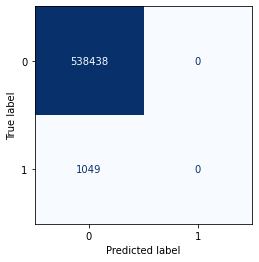

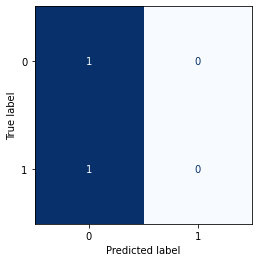

In [19]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_baseline_256n_4l
# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
modelz.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in modelz.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

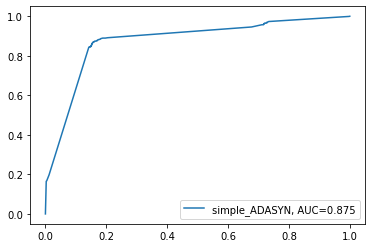

In [20]:
##### Step 6 - Use model to make predictions
modelz = model_FFNN_baseline_256n_4l
# Predict class labels on training data
pred_labels_tr = (modelz.predict(x_training))
# Predict class labels on a test data
pred_labels_te = (modelz.predict(x_test))
#> 0.01).astype(int)
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te), 4)
plt.plot(fpr,tpr,label="simple_ADASYN, AUC="+str(auc))





#add legend
plt.legend()